In [66]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray
from skimage.util import random_noise
from statistics import mode

# Testes

In [2]:
#crie uma matriz 5x5  com valores aleatórios no intervalo [1,100]
matriz = np.random.randint(1,100, size=(5,5))
print(matriz)
matriz.shape

[[61 88 39 67 49]
 [51 53 43 68 42]
 [49  5 30 20 20]
 [88 15 17 39 44]
 [43 76 82 97 75]]


(5, 5)

In [3]:
pad_size = 1
img = np.pad(matriz, (1,1), mode='constant')
img

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0, 61, 88, 39, 67, 49,  0],
       [ 0, 51, 53, 43, 68, 42,  0],
       [ 0, 49,  5, 30, 20, 20,  0],
       [ 0, 88, 15, 17, 39, 44,  0],
       [ 0, 43, 76, 82, 97, 75,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [4]:
a = [[1, 2], [3, 4]]
b = np.pad(a, (2,2), mode='constant', constant_values=(0))
print(b)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 2 0 0]
 [0 0 3 4 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [5]:
#crie uma matriz 4x4 com valores no intervalo [1,16]
matriz2 = np.arange(1,17).reshape(4,4)
print(matriz2)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [6]:
rl = np.pad(matriz2, ((pad_size,pad_size),(pad_size,pad_size)), mode='reflect')
rl

array([[ 6,  5,  6,  7,  8,  7],
       [ 2,  1,  2,  3,  4,  3],
       [ 6,  5,  6,  7,  8,  7],
       [10,  9, 10, 11, 12, 11],
       [14, 13, 14, 15, 16, 15],
       [10,  9, 10, 11, 12, 11]])

In [7]:
matriz

array([[61, 88, 39, 67, 49],
       [51, 53, 43, 68, 42],
       [49,  5, 30, 20, 20],
       [88, 15, 17, 39, 44],
       [43, 76, 82, 97, 75]])

In [8]:
matriz[0:3,1:4]

array([[88, 39, 67],
       [53, 43, 68],
       [ 5, 30, 20]])

# Questão 01

In [135]:
def borda_ignore(img, filtro):
    result = np.copy(img)
    if len(img.shape) == 3:
        for d in range(img.shape[2]):
            for i in range(1,img.shape[0]-1):
                for j in range(1,img.shape[1]-1):
                    janela = img[i-1:i+2, j-1:j+2, d]
                    result[i,j,d] = ( janela * filtro).sum() 
    else:
        for i in range(1,img.shape[0]-1):
            for j in range(1,img.shape[1]-1):
                janela = img[i-1:i+2, j-1:j+2]
                result[i,j] = (janela * filtro).sum()    
    return result

In [142]:
def definir_padding(img, filtro, borda):
    m = filtro.shape[0]
    n = filtro.shape[1]
    a = (m-1)//2
    b = (n-1)//2
    
    if borda == 'zero':
        imgPad = np.pad(img, (a,b), mode='constant', constant_values=(0))
    
    elif borda == 'replicar':
        imgPad = np.pad(img, ((a,b),(a,b)), mode='edge')

    elif borda == 'espelhar':
        imgPad = np.pad(img, ((a,b),(a,b)), mode='reflect')
    
    else:
        imgPad = None
        Exception('Borda não definida')
    
    return imgPad, a, b

In [143]:
def borda_padding(img,filtro, borda):
    imgPad, a, b = definir_padding(img, filtro, borda)
    result = np.copy(img.shape)
    if len(img.shape)==3:
        for d in range(img.shape[2]):
            for i in range(a, imgPad.shape[0]-1):
                for j in range(b, imgPad.shape[1]-1):
                    janela = imgPad[i-1:i+2, j-1:j+2, d]
                    result[i-1,j-1,d] = (janela * filtro).sum()
    
    else:
        for i in range(a, imgPad.shape[0]-1):
            for j in range(b, imgPad.shape[1]-1):
                janela = imgPad[i-1:i+2, j-1:j+2]
                result[i-1,j-1] = (janela * filtro).sum()
    
    return result

In [138]:
def convolucao(imagem, filtro, borda='ignore'):
    if borda=='ignore':
        imagem_processada = borda_ignore(imagem, filtro)
    
    else:
        imagem_processada = borda_padding(imagem, filtro, borda)

    return imagem_processada

In [17]:
#Filtros
filtro_media = np.ones((3,3))/9

In [18]:
img = imread('sailor_moon.jpg')
img = np.interp(img, (img.min(), img.max()), (0, 1))
img_gray = rgb2gray(img)
img_ruido = random_noise(img, mode='s&p')
img.shape, img_gray.shape, img_ruido.shape

((282, 282, 3), (282, 282), (282, 282, 3))

In [19]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
plt.title('RGB')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_gray, cmap='gray')
plt.title('Gray')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img_ruido)
plt.title('Ruido')

Text(0.5, 1.0, 'Ruido')

Text(0.5, 1.0, 'Ruido')

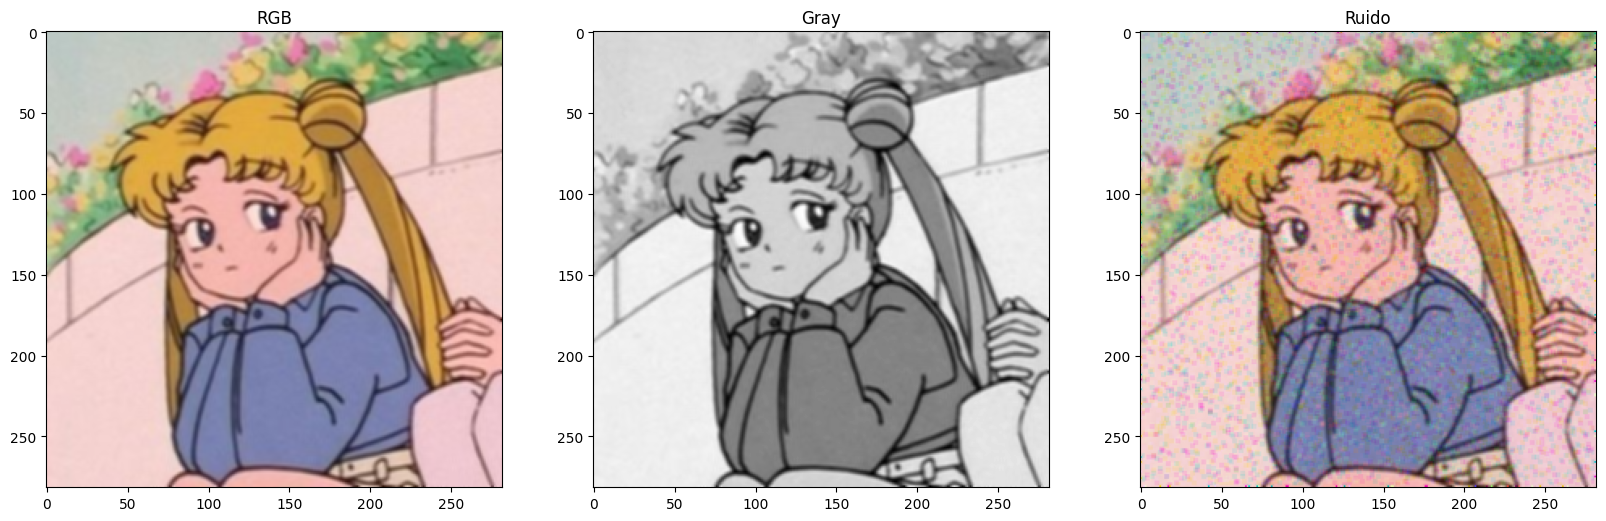

In [20]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(convolucao(img, filtro_media))
plt.title('RGB')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(convolucao(img_gray, filtro_media), cmap='gray')
plt.title('Gray')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(convolucao(img_ruido, filtro_media))
plt.title('Ruido')

# Questão 02

In [21]:
def mediana(janela):
    return np.median(janela)

In [22]:
def maior(janela):
    return np.max(janela)

In [23]:
def menor(janela):
    return np.min(janela)

In [67]:
def moda(janela):
    return mode(janela.ravel())

In [132]:
def aplicar_filtro(imagem, janela, funcao):
    # Cria uma imagem preta com o mesmo tamanho da imagem original
    nova_imagem = np.copy(imagem)

    if len(imagem.shape) == 3:
        for d in range(imagem.shape[2]):
            for i in range(1,imagem.shape[0]-1):
                for j in range(1,imagem.shape[1]-1):
                    janela_imagem = imagem[i-1:i+janela[0]-1, j-1:j+janela[1]-1, d]
                    nova_imagem[i,j,d] = funcao(janela_imagem)
    
    else:
        for i in range(1,imagem.shape[0]-1):
            for j in range(1,imagem.shape[1]-1):
                janela_imagem = imagem[i-1:i+janela[0]-1, j-1:j+janela[1]-1]
                nova_imagem[i, j] = funcao(janela_imagem)
    
    
    return nova_imagem


In [69]:
def filtro_nao_linear(imagem, janela=(3,3), funcao='mediana'):
    if funcao == 'mediana':
        imagem_processada = aplicar_filtro(imagem, janela, mediana)
    elif funcao == 'maior':
        imagem_processada = aplicar_filtro(imagem, janela, maior)
    elif funcao == 'menor':
        imagem_processada = aplicar_filtro(imagem, janela, menor)
    elif funcao == 'moda':
        imagem_processada = aplicar_filtro(imagem, janela, moda)
    else:
        print('Função não definida')
        return None
    
    return imagem_processada

In [79]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

ax[0][0].imshow(filtro_nao_linear(img))
ax[0][0].set_title('Mediana')

ax[0][1].imshow(filtro_nao_linear(img, funcao='moda'))
ax[0][1].set_title('Moda')

ax[0][2].imshow(filtro_nao_linear(img, funcao='maior'))
ax[0][2].set_title('Maior')

ax[0][3].imshow(filtro_nao_linear(img, funcao='menor'))
ax[0][3].set_title('Menor')

ax[1][0].imshow(filtro_nao_linear(img_gray), cmap='gray')
ax[1][0].set_title('Mediana')

ax[1][1].imshow(filtro_nao_linear(img_gray, funcao='moda'), cmap='gray')
ax[1][1].set_title('Moda')

ax[1][2].imshow(filtro_nao_linear(img_gray, funcao='maior'), cmap='gray')
ax[1][2].set_title('Maior')

ax[1][3].imshow(filtro_nao_linear(img_gray, funcao='menor'), cmap='gray')
ax[1][3].set_title('Menor')

ax[2][0].imshow(filtro_nao_linear(img_ruido))
ax[2][0].set_title('Mediana')

ax[2][1].imshow(filtro_nao_linear(img_ruido, funcao='moda'))
ax[2][1].set_title('Moda')

ax[2][2].imshow(filtro_nao_linear(img_ruido, funcao='maior'))
ax[2][2].set_title('Maior')

ax[2][3].imshow(filtro_nao_linear(img_ruido, funcao='menor'))
ax[2][3].set_title('Menor')

Text(0.5, 1.0, 'Menor')

# Questão 03

In [119]:
filtro_laplaciano = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
filtro_laplaciano

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [120]:
result = img_gray + convolucao(img_gray, filtro_laplaciano)

In [125]:
# Define o fator de ponderação para a imagem original e a imagem Laplaciana
alpha = 0.9
beta = 1 - alpha

In [126]:
result2 = alpha * img_gray + beta * convolucao(img_gray, filtro_laplaciano)

In [128]:
imshow(result, cmap='gray')

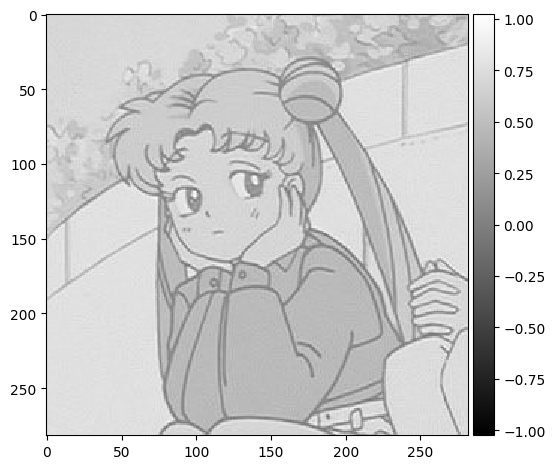

In [129]:
imshow(result2, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


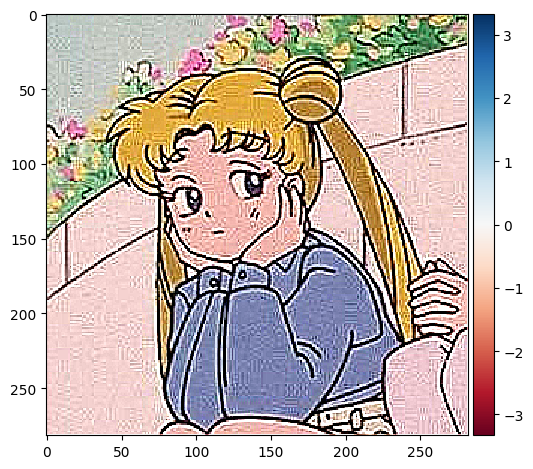

In [130]:
imshow(img+convolucao(img, filtro_laplaciano))

# Questão 04

# Questão 05

In [80]:
imagem_media = convolucao(img_ruido, filtro_media)
imagem_mediana = filtro_nao_linear(img_ruido)

Text(0.5, 1.0, 'Imagem com filtro mediana')

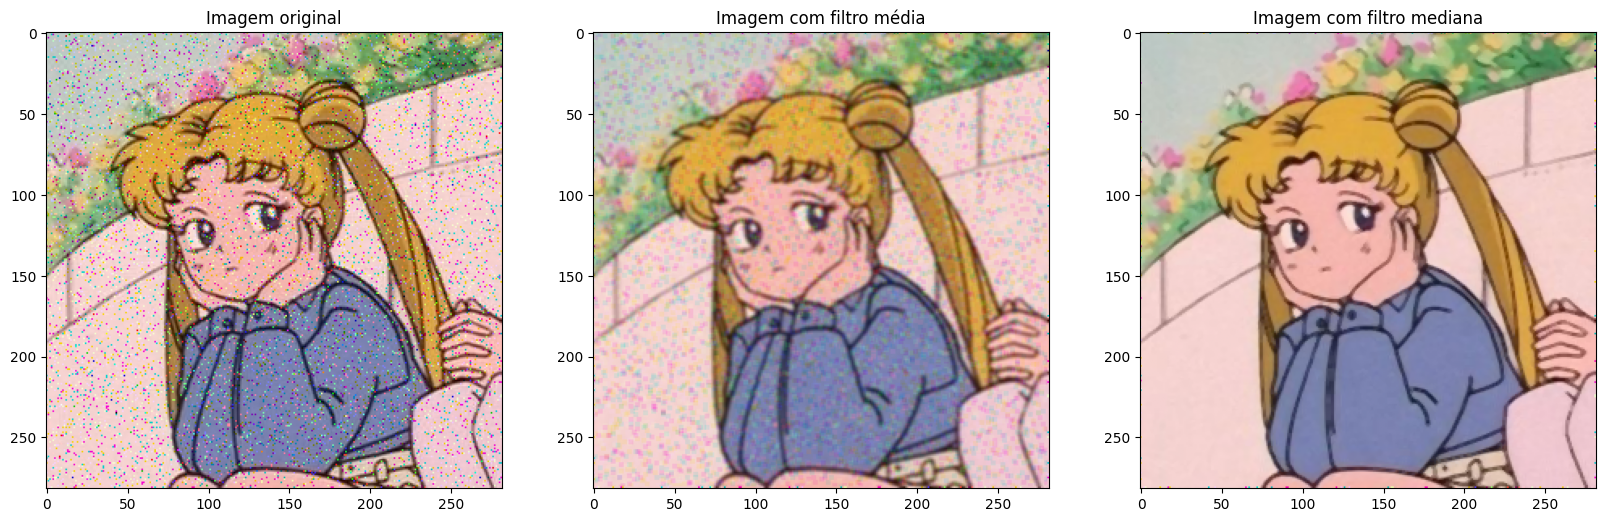

In [81]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_ruido)
plt.title('Imagem original')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(imagem_media)
plt.title('Imagem com filtro média')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(imagem_mediana)
plt.title('Imagem com filtro mediana')